# **LINEAR SVC**

In [1]:
from  sklearn import svm
import pandas as pd 
import numpy as np
np.random.seed(40)
print('\n\t### Training Linear SVC Classifier ### \n')
l_SVC = svm.LinearSVC(class_weight='balanced', random_state=40)
l_SVC_parameters = {
            'C':(0.1,1,100),
            }


	### Training Linear SVC Classifier ### 



#  **Random UnderSampling and OverSampling**   ###

In [2]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
import pandas as pd

X = pd.read_csv('training_data.csv')
y = pd.read_csv('train_data_classlabels.csv')
counts_0 = {0: 40000, 1 : 142} 
counts_1= {0: 40000, 1: 3500}

pipeline = Pipeline([
    ('under_sampling', RandomUnderSampler(sampling_strategy=counts_0, random_state=40)),
    ('over_sampling', RandomOverSampler(sampling_strategy=counts_1, random_state=40))
])

X_random_selected, y_random_selected = pipeline.fit_resample(X, y)

# train_test_split

from sklearn.model_selection import train_test_split
X_train_rs, X_test_rs, y_train_rs, y_test_rs = train_test_split(X_random_selected, y_random_selected, test_size = 0.4, random_state = 40)

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

grid = GridSearchCV(l_SVC, l_SVC_parameters, scoring='f1_macro', cv = 5 )

# fitting the model for grid search
grid.fit(X_train_rs, y_train_rs)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_rs)

# print classification report
print(classification_report(y_test_rs, grid_predictions))

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\sharm\AppData\Local\Packages\P

{'C': 1}
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     16003
         1.0       0.97      0.73      0.84      1397

    accuracy                           0.98     17400
   macro avg       0.97      0.87      0.91     17400
weighted avg       0.98      0.98      0.98     17400



C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Feature selection ###

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.24974955 0.25423044 0.25769693 0.2601009  0.26428704 0.25676883
 0.25626762 0.26103921 0.25425685 0.26360023 0.26888266 0.26877394
 0.27095616 0.24906749 0.27132433 0.24976756 0.26732259 0.27245274
 0.26511749 0.25576793 0.25040564 0.25431349 0.25033172 0.24988304
 0.24917854 0.25108502 0.2503933  0.25442601 0.25183202 0.1937974 ]



<Axes: >

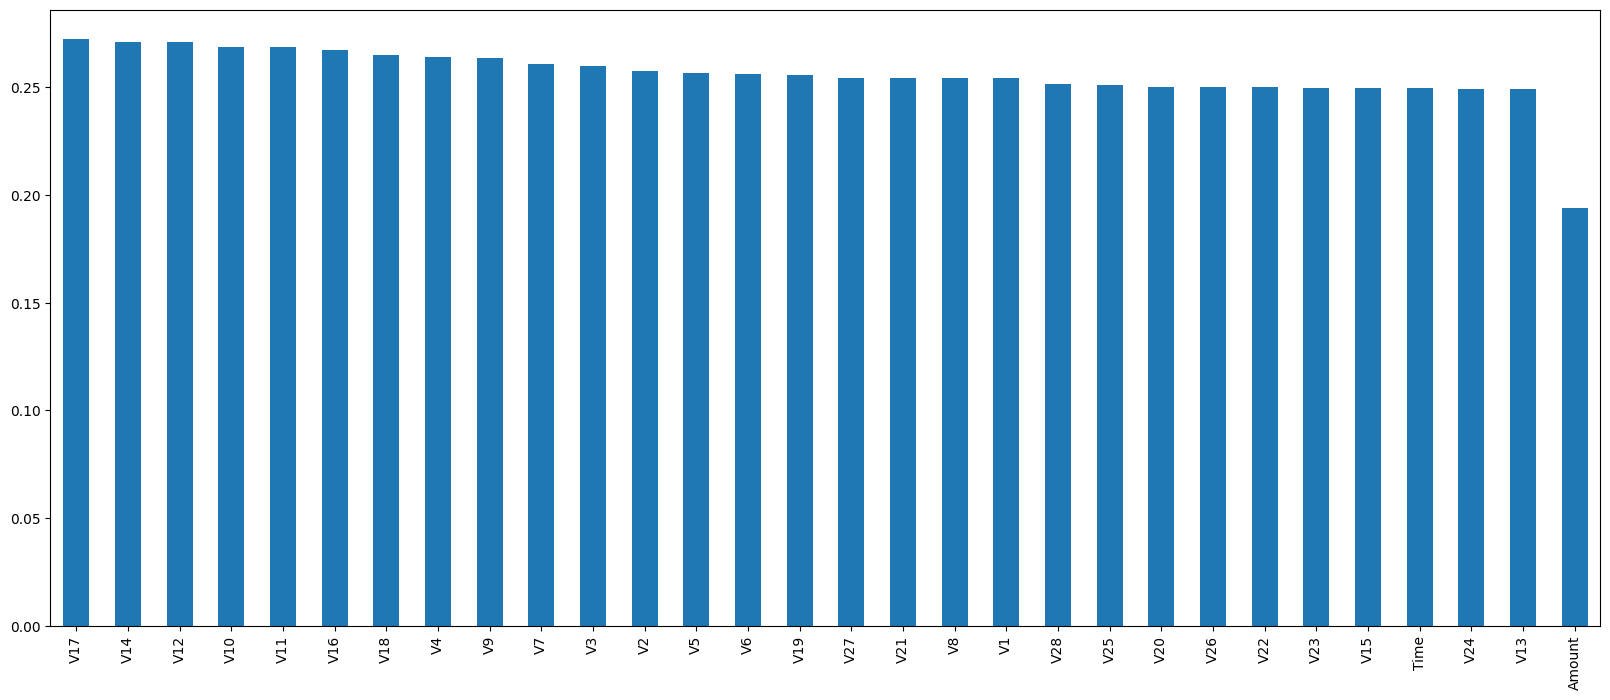

In [7]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
m_rs = mutual_info_classif(X_train_rs, y_train_rs)
print(m_rs)
print()

m_rs = pd.Series(m_rs)

m_rs.index = X_train_rs.columns
m_rs.sort_values(ascending= False)
m_rs.sort_values(ascending= False).plot.bar(figsize=(20,8))


# Selecting KBest

In [8]:
from sklearn.feature_selection import SelectKBest
k_best = 29
mi_selector = SelectKBest(mutual_info_classif, k = k_best)
X_train_selected_rs = mi_selector.fit_transform(X_train_rs, y_train_rs)
X_test_selected_rs = mi_selector.transform(X_test_rs)


C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

grid = GridSearchCV(l_SVC, l_SVC_parameters, scoring='f1_macro', cv =5)

# fitting the model for grid search
grid.fit(X_train_selected_rs, y_train_rs)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_selected_rs)

# print classification report
print(classification_report(y_test_rs, grid_predictions))

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\sharm\AppData\Local\Packages\P

{'C': 1}
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     16003
         1.0       0.97      0.72      0.83      1397

    accuracy                           0.98     17400
   macro avg       0.97      0.86      0.91     17400
weighted avg       0.98      0.98      0.97     17400



C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Feature Selection for Linear_SVC

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


<Axes: >

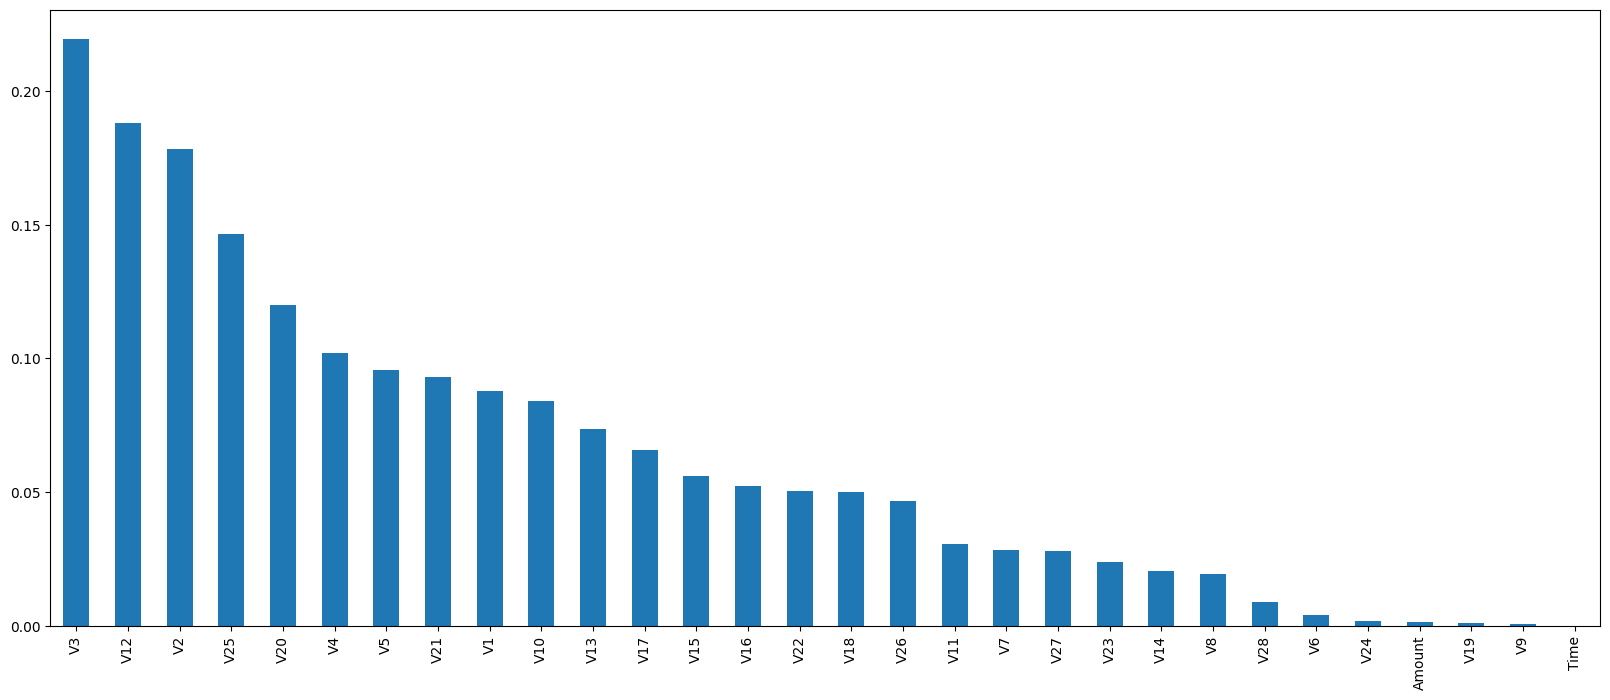

In [10]:
l_SVC.fit(X_train_rs, y_train_rs)

coefficients_rs = l_SVC.coef_[0]

feature_importance_rs = pd.Series(np.abs(coefficients_rs), index =X_train_rs.columns)
feature_importance_rs.sort_values(ascending=False).plot.bar(figsize =(20,8))

#  Selecting KBest for Linear SVC

In [11]:
k = 28
top_k_features = feature_importance_rs.nlargest(k).index

print(top_k_features)

X_train_selected_rs_1 = X_train_rs[top_k_features]
X_test_selected_rs_1 = X_test_rs[top_k_features]


Index(['V3', 'V12', 'V2', 'V25', 'V20', 'V4', 'V5', 'V21', 'V1', 'V10', 'V13',
       'V17', 'V15', 'V16', 'V22', 'V18', 'V26', 'V11', 'V7', 'V27', 'V23',
       'V14', 'V8', 'V28', 'V6', 'V24', 'Amount', 'V19'],
      dtype='object')


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

grid = GridSearchCV(l_SVC, l_SVC_parameters, scoring='f1_macro', cv =5)

# fitting the model for grid search
grid.fit(X_train_selected_rs_1, y_train_rs)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_selected_rs_1)

# print classification report
print(classification_report(y_test_rs, grid_predictions))

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\sharm\AppData\Local\Packages\P

{'C': 0.1}
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     16003
         1.0       0.88      0.93      0.91      1397

    accuracy                           0.98     17400
   macro avg       0.94      0.96      0.95     17400
weighted avg       0.99      0.98      0.98     17400



C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# **SMOTETomek** 

In [3]:
from imblearn.combine import SMOTETomek
smto = SMOTETomek()
X_smto, y_smto = smto.fit_resample(X, y)

from sklearn.model_selection import train_test_split
X_train_smto, X_test_smto, y_train_smto, y_test_smto = train_test_split(X_smto, y_smto, test_size = 0.2, random_state = 40)

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

grid = GridSearchCV(l_SVC, l_SVC_parameters, scoring='f1_macro', cv =5)

# fitting the model for grid search
grid.fit(X_train_smto, y_train_smto)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_smto)

# print classification report
print(classification_report(y_test_smto, grid_predictions))

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\sharm\AppData\Local\Packages\P

{'C': 1}
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     11401
         1.0       0.99      0.90      0.94     11340

    accuracy                           0.94     22741
   macro avg       0.95      0.94      0.94     22741
weighted avg       0.95      0.94      0.94     22741



C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Feature selection ###

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.30792007 0.30071946 0.42134468 0.49421858 0.51934949 0.25398161
 0.3710139  0.39994169 0.24379813 0.35774493 0.52892654 0.49848726
 0.52550351 0.05133813 0.57785507 0.05950074 0.42151191 0.48116473
 0.29682027 0.14139628 0.17273158 0.33753466 0.03780243 0.10464772
 0.09663137 0.09508127 0.17081748 0.31459906 0.27025757 0.30994791]



<Axes: >

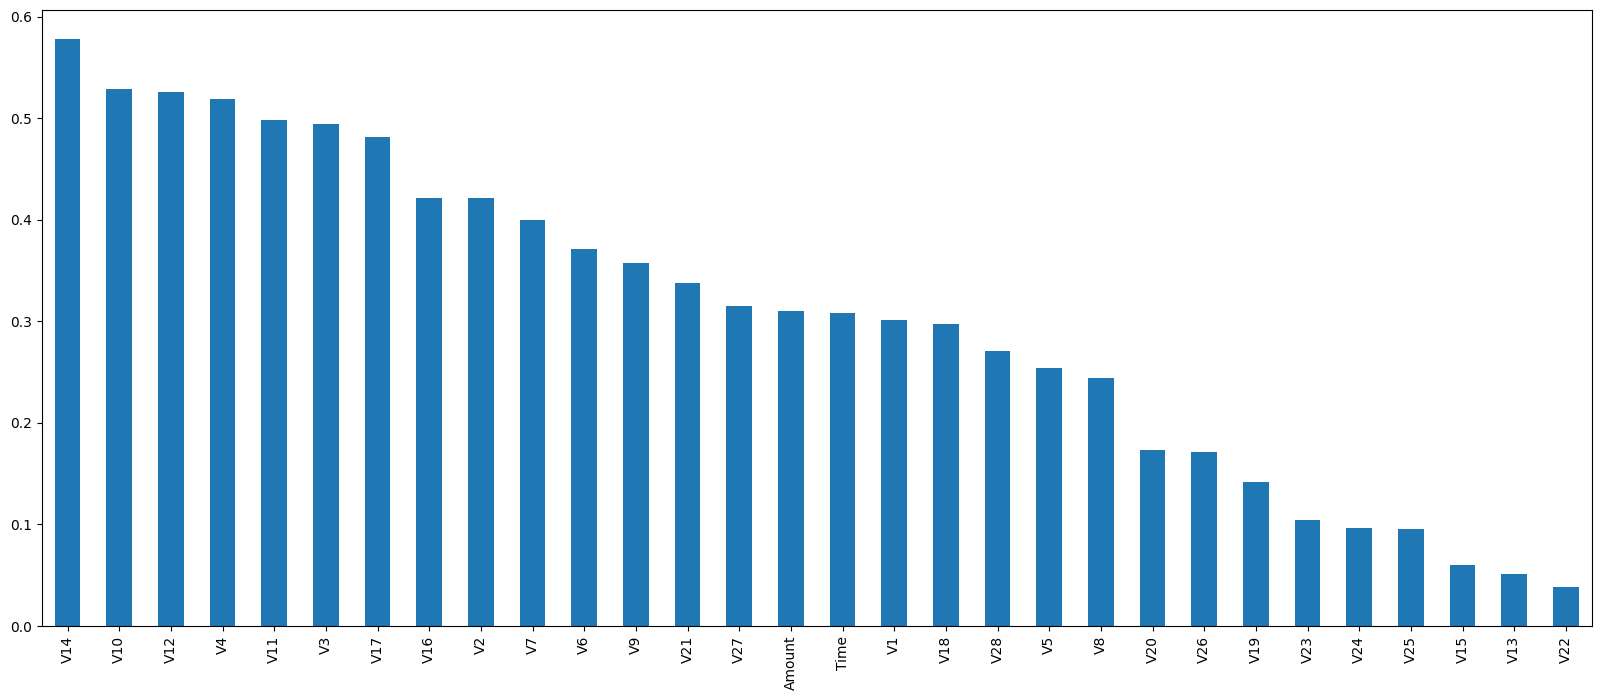

In [14]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
m_smto = mutual_info_classif(X_train_smto, y_train_smto)
print(m_smto)
print()

m_smto = pd.Series(m_smto)

m_smto.index = X_train_smto.columns
m_smto.sort_values(ascending= False)
m_smto.sort_values(ascending= False).plot.bar(figsize=(20,8))


# Selecting KBest

In [15]:
from sklearn.feature_selection import SelectKBest
k_best = 27
mi_selector = SelectKBest(mutual_info_classif, k = k_best)
X_train_selected_smto = mi_selector.fit_transform(X_train_smto, y_train_smto)
X_test_selected_smto = mi_selector.transform(X_test_smto)


C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

grid = GridSearchCV(l_SVC, l_SVC_parameters, scoring='f1_macro', cv =5)

# fitting the model for grid search
grid.fit(X_train_selected_smto, y_train_smto)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_selected_smto)

# print classification report
print(classification_report(y_test_smto, grid_predictions))

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\sharm\AppData\Local\Packages\P

{'C': 1}
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95     11388
         1.0       0.98      0.92      0.95     11350

    accuracy                           0.95     22738
   macro avg       0.96      0.95      0.95     22738
weighted avg       0.96      0.95      0.95     22738



C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Feature Selection for Linear SVC

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


<Axes: >

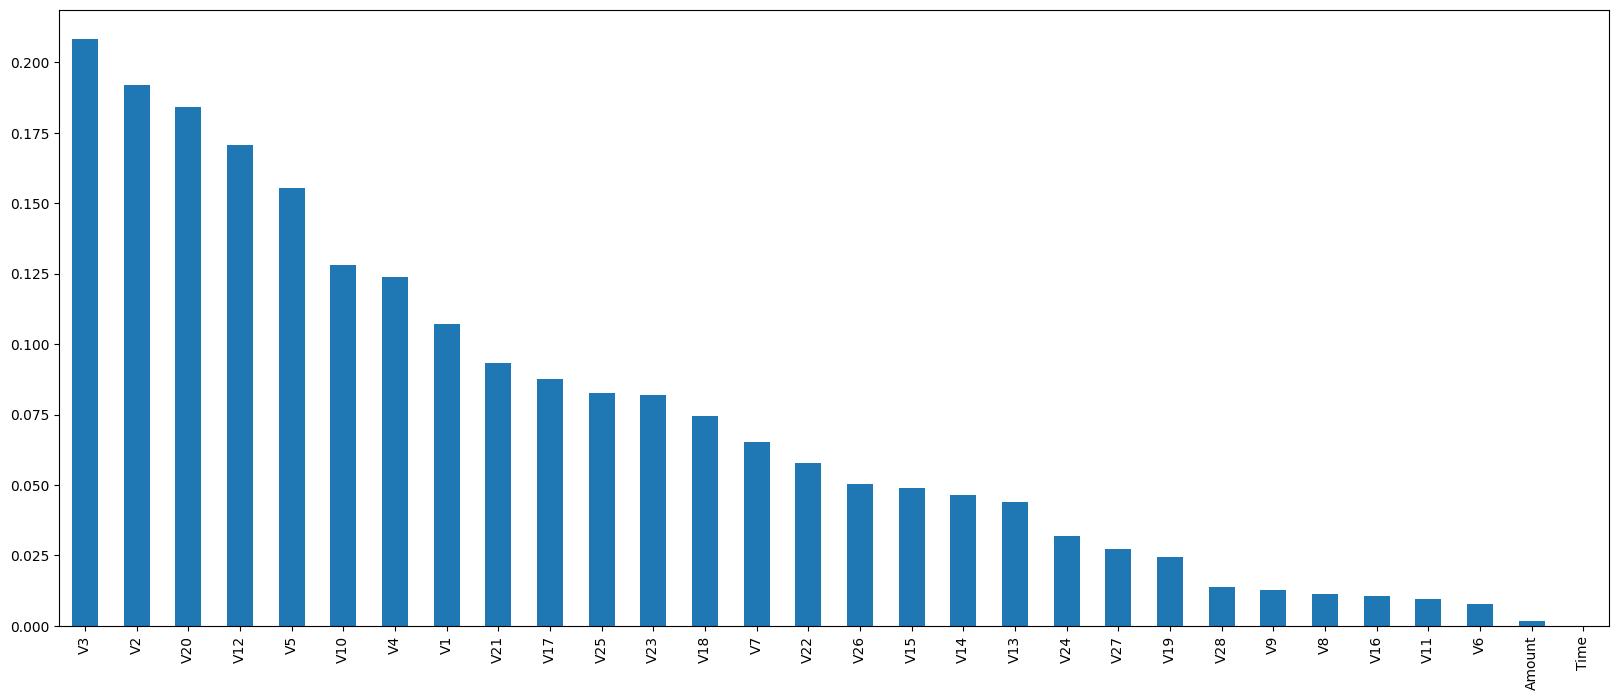

In [5]:
l_SVC.fit(X_train_smto, y_train_smto)

coefficients_smto = l_SVC.coef_[0]

feature_importance_smto = pd.Series(np.abs(coefficients_smto), index =X_train_smto.columns)
feature_importance_smto.sort_values(ascending=False).plot.bar(figsize =(20,8))

# Selecting KBest for Linear SVC

# **BEST**

In [6]:
k = 28
top_k_features = feature_importance_smto.nlargest(k).index

print(top_k_features)

X_train_selected_smto_1 = X_train_smto[top_k_features]
X_test_selected_smto_1 = X_test_smto[top_k_features]


Index(['V3', 'V2', 'V20', 'V12', 'V5', 'V10', 'V4', 'V1', 'V21', 'V17', 'V25',
       'V23', 'V18', 'V7', 'V22', 'V26', 'V15', 'V14', 'V13', 'V24', 'V27',
       'V19', 'V28', 'V9', 'V8', 'V16', 'V11', 'V6'],
      dtype='object')


In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report, confusion_matrix

grid = GridSearchCV(l_SVC, l_SVC_parameters, scoring='f1_macro', cv =5)

# fitting the model for grid search
grid.fit(X_train_selected_smto_1, y_train_smto)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_selected_smto_1)

# print confusion_matrix
print(confusion_matrix(y_test_smto, grid_predictions))

# print classification report
print(classification_report(y_test_smto, grid_predictions))

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\sharm\AppData\Local\Packages\P

{'C': 100}
[[11055   346]
 [  382 10958]]
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97     11401
         1.0       0.97      0.97      0.97     11340

    accuracy                           0.97     22741
   macro avg       0.97      0.97      0.97     22741
weighted avg       0.97      0.97      0.97     22741



C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# **SMOTE + TOMEKLinks**

In [18]:
from imblearn.over_sampling import SMOTE
desired_counts = {0:57000, 1: 5500}
smot = SMOTE(sampling_strategy=desired_counts, random_state=40)
X_smot, y_smot =smot.fit_resample(X, y)

from imblearn.under_sampling import TomekLinks

tomek_links = TomekLinks()
X_smotu, y_smotu = tomek_links.fit_resample(X_smot, y_smot)

from sklearn.model_selection import train_test_split
X_train_smotu, X_test_smotu, y_train_smotu, y_test_smotu = train_test_split(X_smotu, y_smotu, test_size = 0.3, random_state = 40)

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

grid = GridSearchCV(l_SVC, l_SVC_parameters, scoring='f1_macro', cv =5)

# fitting the model for grid search
grid.fit(X_train_smotu, y_train_smotu)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_smotu)

# print classification report
print(classification_report(y_test_smotu, grid_predictions))

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\sharm\AppData\Local\Packages\P

{'C': 100}
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     17016
         1.0       0.99      0.77      0.87      1694

    accuracy                           0.98     18710
   macro avg       0.98      0.88      0.93     18710
weighted avg       0.98      0.98      0.98     18710



C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Feature Selection

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.10919052 0.1162004  0.17385205 0.20958557 0.21542547 0.11742366
 0.15946778 0.17571248 0.10819005 0.15998037 0.23189295 0.22323856
 0.2312661  0.01174203 0.25050956 0.01682305 0.18982667 0.21999999
 0.14422164 0.05784564 0.06582582 0.13830833 0.01280036 0.04148292
 0.03125758 0.04240343 0.05447078 0.12760939 0.10399311 0.09040014]



<Axes: >

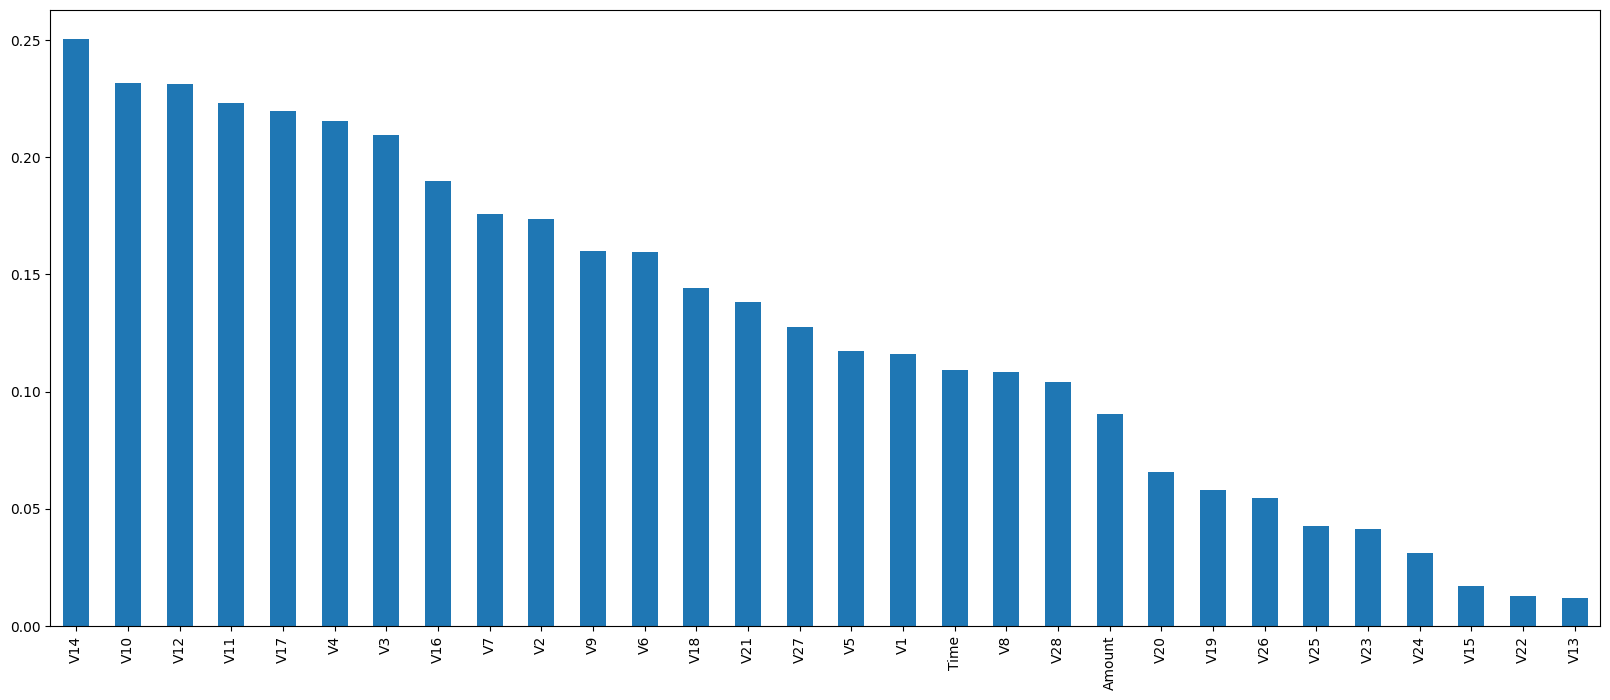

In [19]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
m_smotu = mutual_info_classif(X_train_smotu, y_train_smotu)
print(m_smotu)
print()

m_smotu = pd.Series(m_smotu)

m_smotu.index = X_train_smotu.columns
m_smotu.sort_values(ascending= False)
m_smotu.sort_values(ascending= False).plot.bar(figsize=(20,8))


# Selecting Kbest

In [20]:
from sklearn.feature_selection import SelectKBest
k_best = 26
mi_selector = SelectKBest(mutual_info_classif, k = k_best)
X_train_selected_smotu = mi_selector.fit_transform(X_train_smotu, y_train_smotu)
X_test_selected_smotu = mi_selector.transform(X_test_smotu)


C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

grid = GridSearchCV(l_SVC, l_SVC_parameters, scoring='f1_macro', cv =5)

# fitting the model for grid search
grid.fit(X_train_selected_smotu, y_train_smotu)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_selected_smotu)

# print classification report
print(classification_report(y_test_smotu, grid_predictions))

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\sharm\AppData\Local\Packages\P

{'C': 100}
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     17016
         1.0       0.97      0.82      0.89      1694

    accuracy                           0.98     18710
   macro avg       0.98      0.91      0.94     18710
weighted avg       0.98      0.98      0.98     18710



C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Feature Selection for Linear SVC

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


<Axes: >

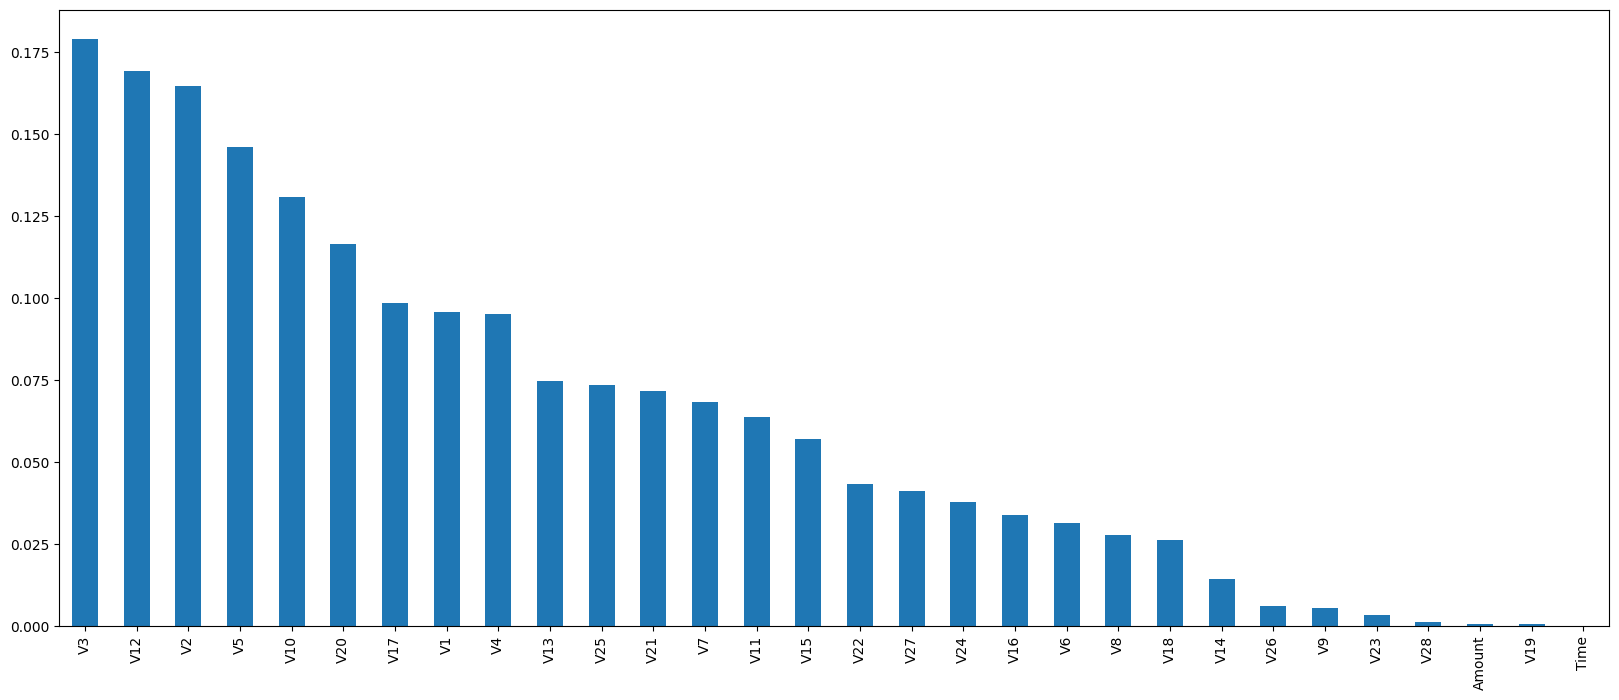

In [25]:
l_SVC.fit(X_train_smotu, y_train_smotu)

coefficients_smotu = l_SVC.coef_[0]

feature_importance_smotu = pd.Series(np.abs(coefficients_smotu), index =X_train_smotu.columns)
feature_importance_smotu.sort_values(ascending=False).plot.bar(figsize =(20,8))

# Selecting KBest for Linear SVC

In [26]:
k = 28
top_k_features = feature_importance_smto.nlargest(k).index

print(top_k_features)

X_train_selected_smotu_1 = X_train_smotu[top_k_features]
X_test_selected_smotu_1 = X_test_smotu[top_k_features]


Index(['V2', 'V3', 'V10', 'V12', 'V5', 'V20', 'V4', 'V1', 'V21', 'V25', 'V23',
       'V17', 'V7', 'V24', 'V13', 'V18', 'V9', 'V22', 'V26', 'V15', 'V27',
       'V14', 'V28', 'V19', 'V6', 'V11', 'V8', 'V16'],
      dtype='object')


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report

grid = GridSearchCV(l_SVC, l_SVC_parameters, scoring='f1_macro', cv =10)

# fitting the model for grid search
grid.fit(X_train_selected_smotu_1, y_train_smotu)

# print best parameter after tuning
print(grid.best_params_)
grid_predictions = grid.predict(X_test_selected_smotu_1)

# print classification report
print(classification_report(y_test_smotu, grid_predictions))

C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\sharm\AppData\Local\Packages\P

{'C': 1}
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     17016
         1.0       0.90      0.96      0.93      1694

    accuracy                           0.99     18710
   macro avg       0.95      0.97      0.96     18710
weighted avg       0.99      0.99      0.99     18710



C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
